## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import seaborn as sns

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools


from keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [2]:
df = pd.read_csv('./HAM10000_metadata.csv')
print(df)

df = df.sort_values('image_id', ascending=True)
df.head()

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest


In [3]:
import os
import glob
base_skin_dir = os.path.join('./skin-mnist-images')


imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob.glob(os.path.join(base_skin_dir, 'HAM10000_images_part_*', '*.jpg'))  # Adjusted pattern
}
imageid_path_dict

{'ISIC_0024306': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024306.jpg',
 'ISIC_0024307': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024307.jpg',
 'ISIC_0024308': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024308.jpg',
 'ISIC_0024309': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024309.jpg',
 'ISIC_0024310': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024310.jpg',
 'ISIC_0024311': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024311.jpg',
 'ISIC_0024312': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024312.jpg',
 'ISIC_0024313': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024313.jpg',
 'ISIC_0024314': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024314.jpg',
 'ISIC_0024315': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024315.jpg',
 'ISIC_0024316': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024316.jpg',
 'ISIC_0024317': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024317.jpg',
 'ISIC_0024318':

In [4]:
df['path'] = df['image_id'].map(imageid_path_dict)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,./skin-mnist-images\HAM10000_images_part_1\ISI...
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,./skin-mnist-images\HAM10000_images_part_1\ISI...
...,...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,./skin-mnist-images\HAM10000_images_part_2\ISI...
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,./skin-mnist-images\HAM10000_images_part_2\ISI...
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,./skin-mnist-images\HAM10000_images_part_2\ISI...
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,./skin-mnist-images\HAM10000_images_part_2\ISI...


In [5]:
#Create lesion type disctionary
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['lesionType'] = df['dx'].map(lesion_type_dict.get) 
df['lesionTypeIndex'] = pd.Categorical(df['lesionType']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,lesionType,lesionTypeIndex
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanocytic nevi,4
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,./skin-mnist-images\HAM10000_images_part_1\ISI...,Melanoma,5


In [6]:
np.asarray(Image.open(df['path'][1])).shape

(450, 600, 3)

In [7]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((200,150))))

In [8]:
df['image'].map(lambda x: x.shape).value_counts()

image
(150, 200, 3)    10015
Name: count, dtype: int64

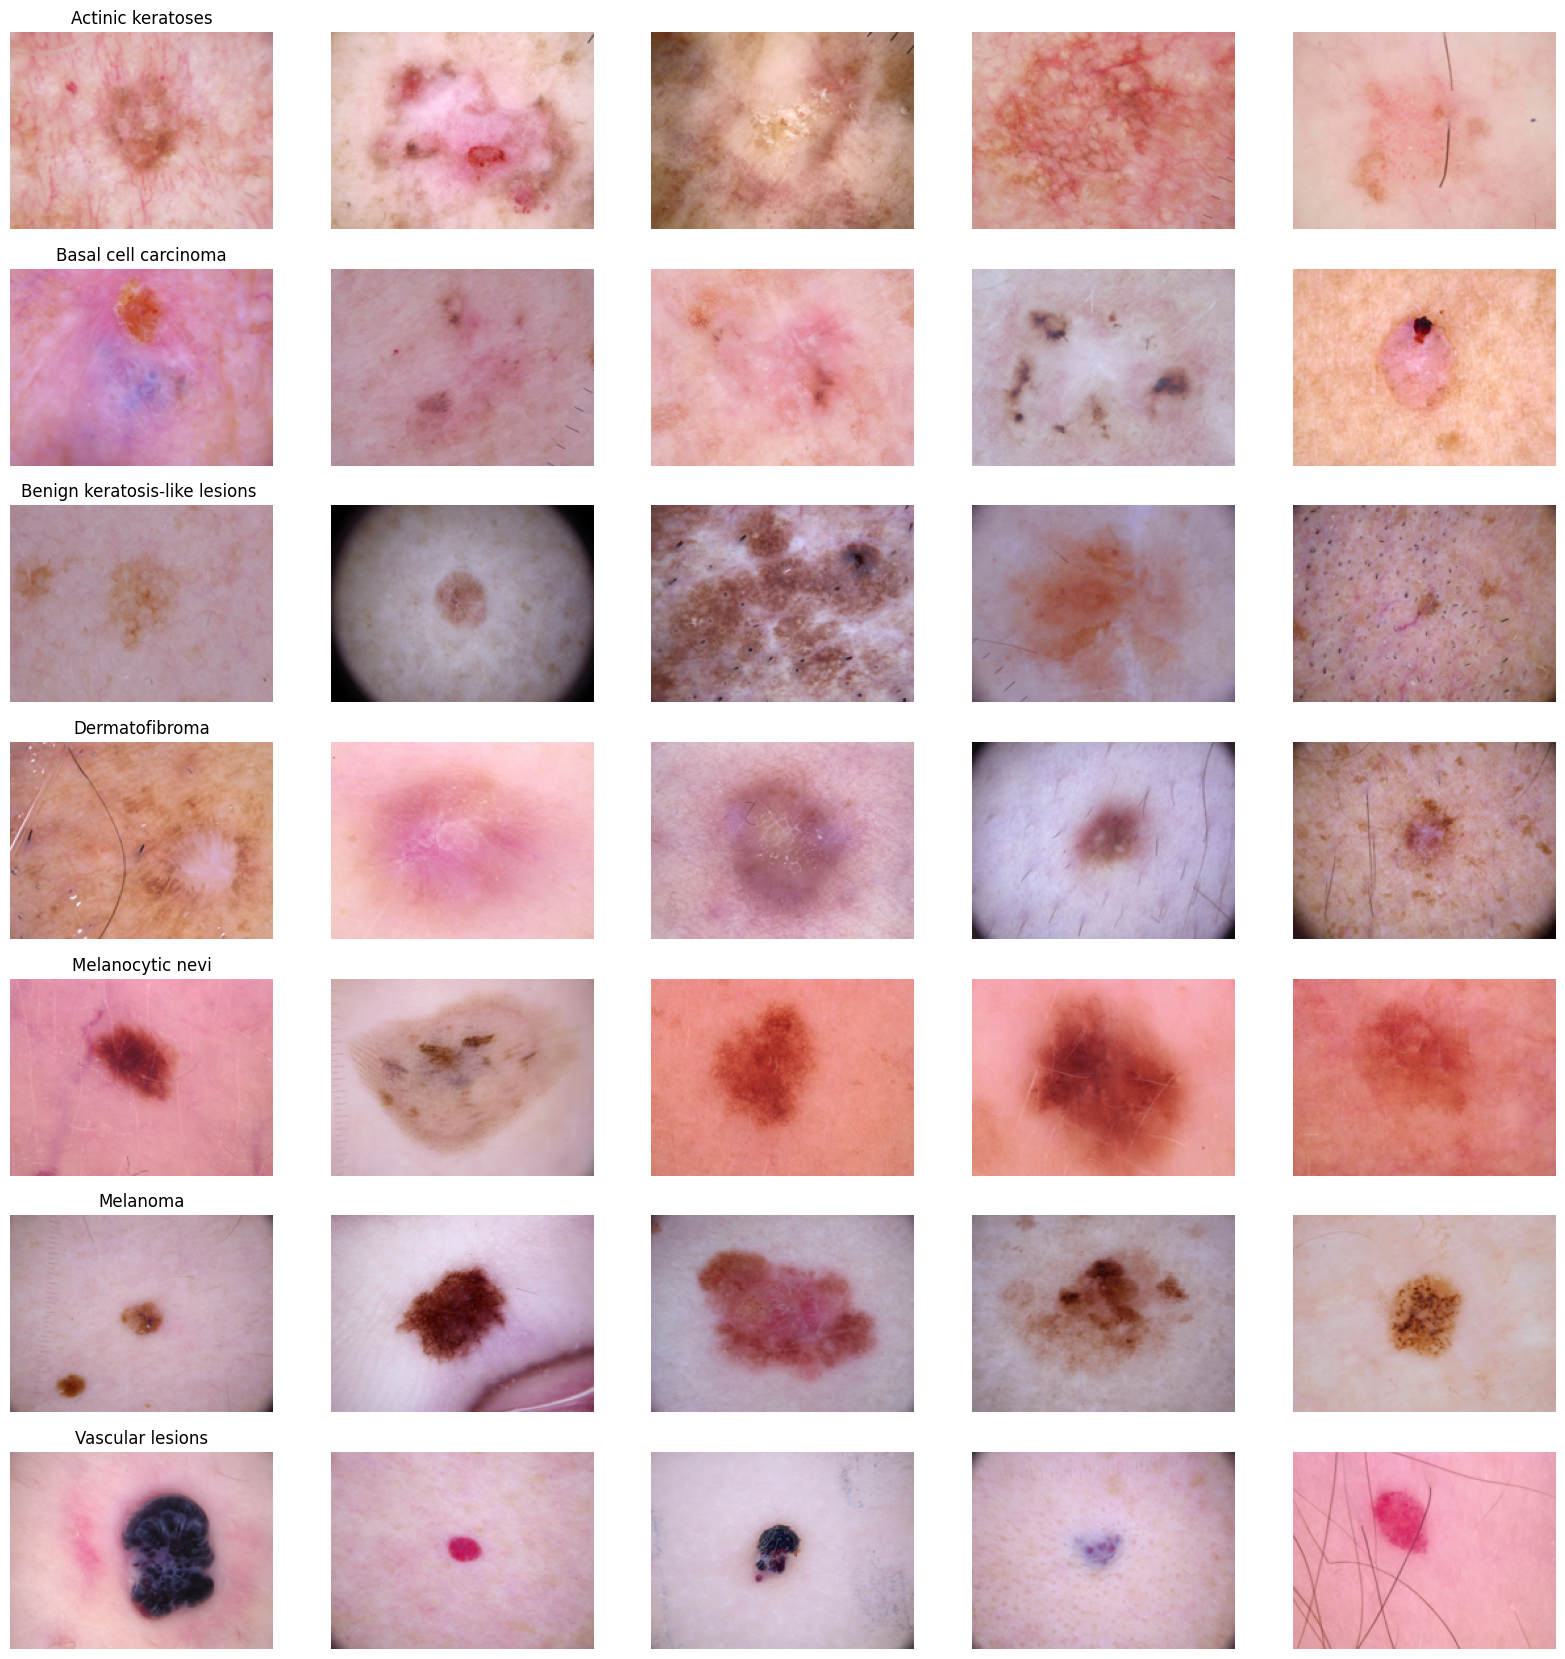

In [9]:
cols = 5
rows = 7
fig, mAxs = plt.subplots(rows, cols, figsize = (4*cols, 3*rows))
for nAxs, (className, rowTypes) in zip(mAxs, 
                                         df.sort_values(['lesionType']).groupby('lesionType')):
    nAxs[0].set_title(className)
    for c_ax, (_, cRow) in zip(nAxs, rowTypes.sample(cols, random_state=5420).iterrows()):
        c_ax.imshow(cRow['image'])
        c_ax.axis('off')
fig.savefig('samples.png', dpi=300)

In [10]:

features = df.drop(columns=['lesionTypeIndex'],axis=1)
target = df['lesionTypeIndex']

In [11]:
from tensorflow.keras.utils import to_categorical
# Split data in train and test data - 90% train & validation - 10% test
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(features, target, test_size=0.1, random_state=5420, shuffle=True)

xTrain = np.asarray(xTrain1['image'].tolist())
xTest = np.asarray(xTest1['image'].tolist())

xTrainMean = np.mean(xTrain)
xTrainStd = np.std(xTrain)

xTestMean = np.mean(xTest)
xTestStd = np.std(xTest)


xTrain = (xTrain - xTrainMean)/xTrainStd

xTest = (xTest - xTestMean)/xTestStd

# One-hot encoding
yTrain = to_categorical(yTrain1, num_classes = 7)
yTest = to_categorical(yTest1, num_classes = 7)


In [12]:

xTrainF, xValidateF, yTrainF, yValidateF = train_test_split(xTrain, yTrain, test_size = 0.1, random_state = 542)
xTrainF = xTrainF.reshape(xTrainF.shape[0], *(150, 200, 3))
xTestF = xTest.reshape(xTest.shape[0], *(150, 200, 3))
xValidateF = xValidateF.reshape(xValidateF.shape[0], *(150, 200, 3))

In [13]:
# Data augmentation to prevent overfitting 
imageGenerator = ImageDataGenerator(
        width_shift_range=0.11,  
        height_shift_range=0.11,  
        rotation_range=25,  
        zoom_range = 0.15,  
        horizontal_flip=True,  
        vertical_flip=True)  

imageGenerator.fit(xTrainF)

### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [15]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Softmax, Dropout
base_model = ResNet50(input_shape=(150, 200,3), include_top=False, weights="imagenet");
num_classes = 7
ResNet50model = Sequential()
ResNet50model.add(base_model)
ResNet50model.add(Dropout(0.2))
ResNet50model.add(Dense(128, activation="relu"))
ResNet50model.add(Dropout(0.2))
ResNet50model.add(Dense(num_classes, activation = 'softmax'))
###################################

for layer in base_model.layers:
    layer.trainable = True



In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Softmax, Dropout
base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(150,200, 3),pooling = 'avg', weights = 'imagenet');
num_classes = 7
ResNet50model = Sequential()
ResNet50model.add(base_model)
ResNet50model.add(Dropout(0.2))
ResNet50model.add(Dense(128, activation="relu"))
ResNet50model.add(Dropout(0.2))
ResNet50model.add(Dense(num_classes, activation = 'softmax'))
###################################

for layer in base_model.layers:
    layer.trainable = True

ResNet50model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
from keras.callbacks import EarlyStopping
model = ResNet50model
# Early haulting by valdiation accuracy:
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 10, verbose = 1, mode = 'auto')

optimizer = Adam(learning_rate = 0.001)
reduceLearningRate = ReduceLROnPlateau(monitor = 'val_loss', 
                                            patience = 5, 
                                            verbose = 1, 
                                            factor = 0.25, 
                                            min_lr = 0.0001)


model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# Now we are going to fit the model:
epochs = 60
batch_size = 16

history = model.fit(imageGenerator.flow(xTrainF,yTrainF, batch_size=batch_size),
                              epochs = epochs, validation_data = (xValidateF, yValidateF),
                              verbose = 1, steps_per_epoch=xTrainF.shape[0] // batch_size
                              , callbacks=[reduceLearningRate, early])

Epoch 1/60


c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


506/506 ━━━━━━━━━━━━━━━━━━━━ 2692s 5s/step - accuracy: 0.6445 - loss: 1.1713 - val_accuracy: 0.6796 - val_loss: 1.1293 - learning_rate: 0.0010
Epoch 2/60
  1/506 ━━━━━━━━━━━━━━━━━━━━ 38:50 5s/step - accuracy: 0.8125 - loss: 0.6520

c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


506/506 ━━━━━━━━━━━━━━━━━━━━ 50s 90ms/step - accuracy: 0.8125 - loss: 0.3267 - val_accuracy: 0.6796 - val_loss: 1.1360 - learning_rate: 0.0010
Epoch 3/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 2504s 5s/step - accuracy: 0.6870 - loss: 0.9163 - val_accuracy: 0.7239 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 4/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.6875 - loss: 0.4655 - val_accuracy: 0.7251 - val_loss: 0.8139 - learning_rate: 0.0010
Epoch 5/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 2503s 5s/step - accuracy: 0.6970 - loss: 0.8289 - val_accuracy: 0.4368 - val_loss: 1.3863 - learning_rate: 0.0010
Epoch 6/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.8125 - loss: 0.2927 - val_accuracy: 0.4656 - val_loss: 1.2935 - learning_rate: 0.0010
Epoch 7/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 2505s 5s/step - accuracy: 0.7001 - loss: 0.8273 - val_accuracy: 0.7195 - val_loss: 0.7574 - learning_rate: 0.0010
Epoch 8/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 52s 94ms/step - accuracy: 0.8125 - loss: 0.2292

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [19]:
train_loss, train_accuracy = model.evaluate(xTrainF, yTrainF, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

Train Loss: 0.4463, Train Accuracy: 0.8307


In [20]:
# Test accuracy:
loss, accuracy = model.evaluate(xTestF, yTest, verbose=1)

# Validation accuracy:
loss_v, accuracy_v = model.evaluate(xValidateF, yValidateF, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8306 - loss: 0.4622
29/29 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7920 - loss: 0.5361
Validation: accuracy = 0.799335  ;  loss_v = 0.528539
Test: accuracy = 0.818363  ;  loss = 0.485761


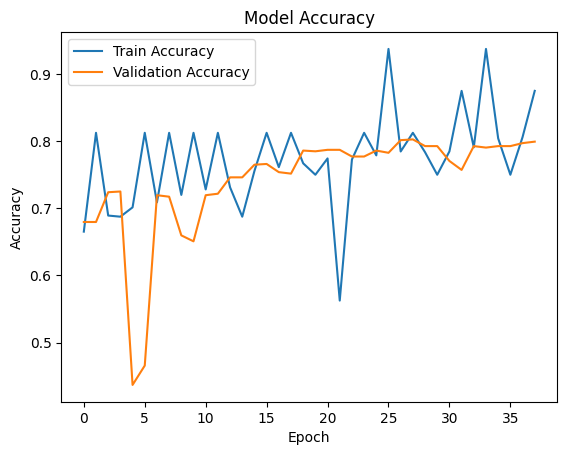

In [22]:
# Plot for train and validation accuracy 
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Validation Accuracy"])
plt.show()

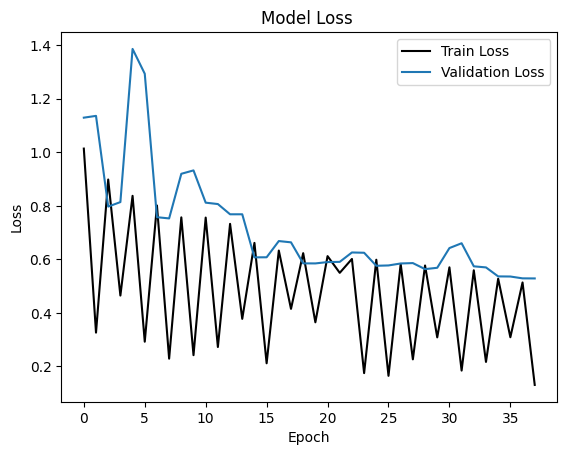

In [23]:
# Plot for train and validation loss
plt.plot(history.history['loss'], color = 'black')
plt.plot(history.history['val_loss'])
plt.title("Model Loss ")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train Loss","Validation Loss"])
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step


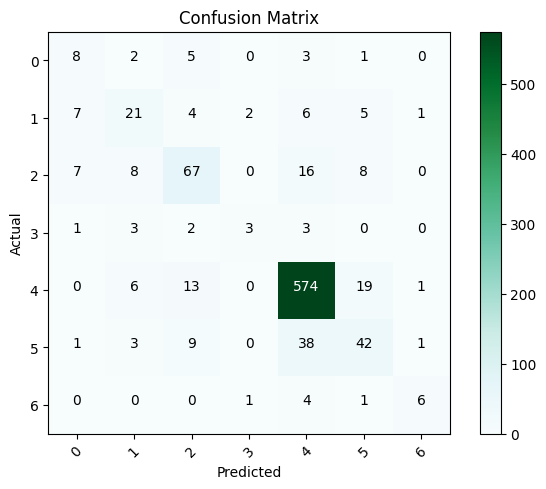

In [24]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
# Confusion matrix    
def plot_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.BuGn):
  
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

# Confusion Matrix for validation data
yHatVal = model.predict(xValidateF)
yHatValClasses = np.argmax(yHatVal,axis = 1) 
yActualVal = np.argmax(yValidateF,axis = 1) 

confusionMatrix = confusion_matrix(yActualVal, yHatValClasses)
 
plot_matrix(confusionMatrix, classes = range(7)) 

32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step


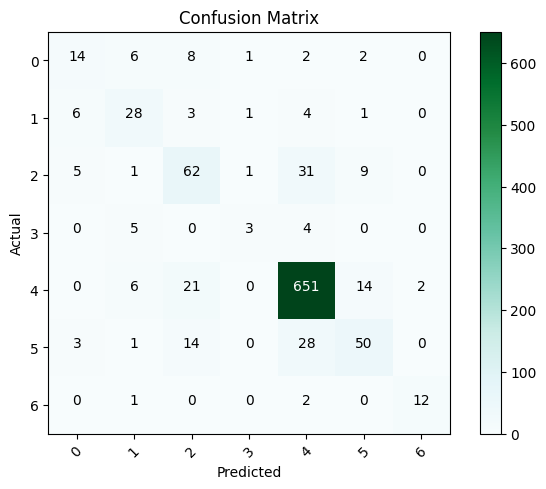

In [25]:
# Confusion Matrix For Test Data:

yHatTest = model.predict(xTestF)

yHatTestClasses = np.argmax(yHatTest,axis = 1) 
yActualTest = np.argmax(yTest,axis = 1) 
confusionMatrix = confusion_matrix(yActualTest, yHatTestClasses)

# plot the confusion matrix
plot_matrix(confusionMatrix, classes = range(7))

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(yActualTest, yHatTestClasses))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46        33
           1       0.58      0.65      0.62        43
           2       0.57      0.57      0.57       109
           3       0.50      0.25      0.33        12
           4       0.90      0.94      0.92       694
           5       0.66      0.52      0.58        96
           6       0.86      0.80      0.83        15

    accuracy                           0.82      1002
   macro avg       0.65      0.59      0.62      1002
weighted avg       0.81      0.82      0.81      1002



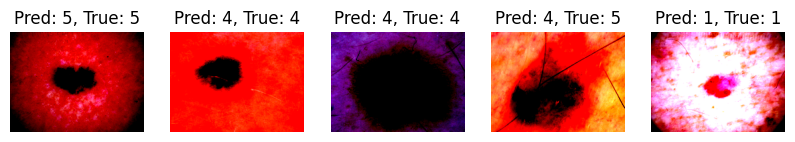

In [34]:
import matplotlib.pyplot as plt

def display_test_images(images, true_labels, pred_labels, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Pred: {pred_labels[i]}, True: {true_labels[i]}")
        plt.axis("off")

display_test_images(xTestF,yActualTest , yHatTestClasses)